9651
1842743


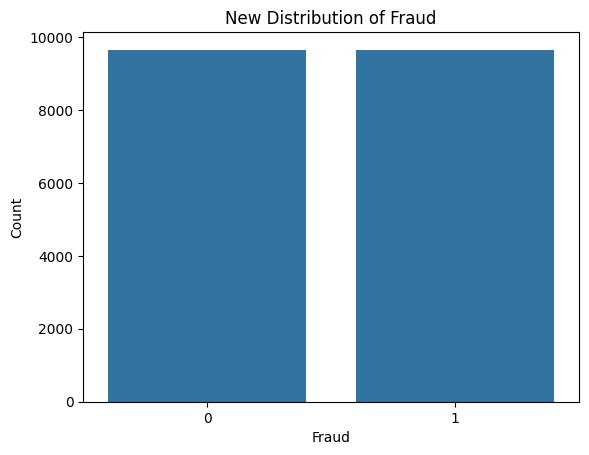

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

train_data=pd.read_csv('fraudTrain.csv')
test_data=pd.read_csv('fraudTest.csv')

Data = pd.concat([train_data,test_data])
Data.describe()
fraud  = Data[Data['is_fraud']==1]
not_fraud  = Data[Data['is_fraud']==0]

print(fraud.shape[0])
print(not_fraud.shape[0])

not_fraud = not_fraud.sample(fraud.shape[0])
data = pd.concat([fraud,not_fraud])
fraud_counts=data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()
categorical_column  =  data.select_dtypes(include = ['object']).columns
label_encoder = LabelEncoder()
for col in categorical_column:
  data[col] = label_encoder.fit_transform(data[col])
scaler  =  StandardScaler()
num_cols = data.select_dtypes(include=[np.number]).columns
print(num_cols)
data[num_cols] = scaler.fit_transform(data[num_cols])
X =  data.drop('is_fraud',axis = 1)
y = data['is_fraud']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)




SVM


In [8]:
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(svm_pred,y_test)

print(svm_accuracy)

print(classification_report(svm_pred,y_test))

0.871017871017871
              precision    recall  f1-score   support

        -1.0       0.97      0.82      0.89      2368
         1.0       0.77      0.96      0.85      1493

    accuracy                           0.87      3861
   macro avg       0.87      0.89      0.87      3861
weighted avg       0.89      0.87      0.87      3861



KNN


In [9]:
knn =KNeighborsClassifier(1)
knn.fit(X_train,y_train)


y_predict = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test,y_predict)
print(f"the accuracy of the model is :- {knn_accuracy}")
print(classification_report(y_test,y_predict))

the accuracy of the model is :- 0.8197358197358198
              precision    recall  f1-score   support

        -1.0       0.86      0.78      0.82      1996
         1.0       0.79      0.86      0.82      1865

    accuracy                           0.82      3861
   macro avg       0.82      0.82      0.82      3861
weighted avg       0.82      0.82      0.82      3861



DECISION TREE CLASSIFIER

In [10]:
decision_tree =  DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
dtc_accuracy = accuracy_score(y_test,y_pred)
print(f"the accuracy is :- {dtc_accuracy}")

print(classification_report(y_test,y_pred))

the accuracy is :- 0.9572649572649573
              precision    recall  f1-score   support

        -1.0       0.96      0.96      0.96      1996
         1.0       0.95      0.96      0.96      1865

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861



Logistic Regression 


In [11]:
model  = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

LR_accuracy =  accuracy_score(y_test,y_predict)
print(f'the accuracy of the model is : - {LR_accuracy}')
print(classification_report(y_test,y_predict))

the accuracy of the model is : - 0.8609168609168609
              precision    recall  f1-score   support

        -1.0       0.82      0.94      0.88      1996
         1.0       0.93      0.77      0.84      1865

    accuracy                           0.86      3861
   macro avg       0.87      0.86      0.86      3861
weighted avg       0.87      0.86      0.86      3861



MODEL COMPARISON



In [12]:
Model_Accuracies = {
  'Logistic Regression': LR_accuracy,
  'K-Nearest Neighbour': knn_accuracy,
  'Decison Tree': dtc_accuracy,
  'Support Vector Machine': svm_accuracy
}


for model,accuracy in Model_Accuracies.items():
  print(f"the accuracy of {model} is :- {accuracy*100:.2f}%")

the accuracy of Logistic Regression is :- 86.09%
the accuracy of K-Nearest Neighbour is :- 81.97%
the accuracy of Decison Tree is :- 95.73%
the accuracy of Support Vector Machine is :- 87.10%
